# Classificação dos dados

Antes de realizar qualquer operação de classificação em nossos dados obtidos em fases anteriores, precisamos prepará-los de forma que o vetor de características esteja apropriado para o parâmetro do método de classificação.

Primeiramente vamos carregar a última instância de dados obtidos:

(10, 6, 2, 20000) - (classes, ensaios, canais, linhas)
(10, 2, 20000)
Creating RawArray with float64 data, n_channels=2, n_times=20000
    Range : 0 ... 19999 =      0.000 ...     5.000 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=20000
    Range : 0 ... 19999 =      0.000 ...     5.000 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=20000
    Range : 0 ... 19999 =      0.000 ...     5.000 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=20000
    Range : 0 ... 19999 =      0.000 ...     5.000 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=20000
    Range : 0 ... 19999 =      0.000 ...     5.000 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=20000
    Range : 0 ... 19999 =      0.000 ...     5.000 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=20000
    Range : 0 ... 19999 =      0.000 ...     5.000 secs
Ready.
Creating RawArray with float64 dat

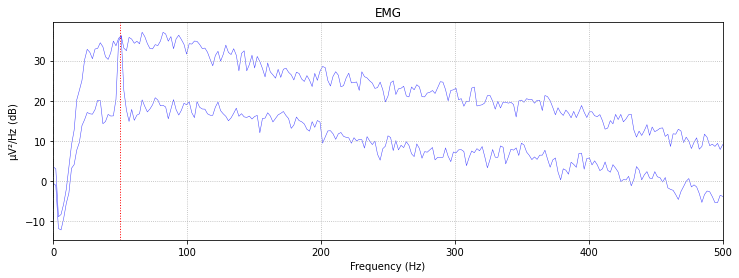

Gráfico de PSD filtrado (notch):


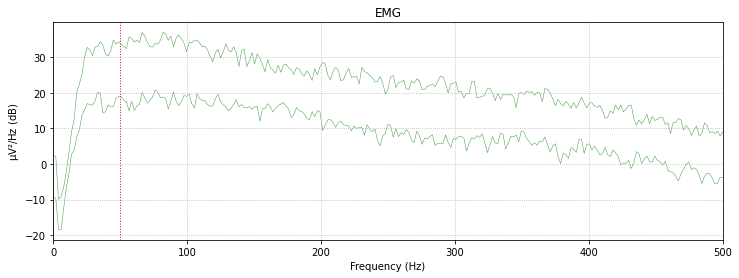

Gráfico de PSD filtrado (bandpass) final:


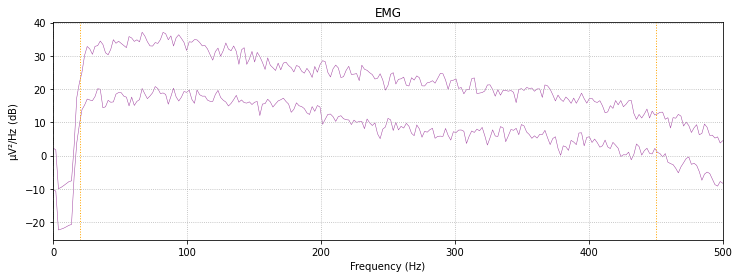


Organização dos dados imediatamente após os filtros:

[<RawArray | 2 x 20000 (5.0 s), ~320 kB, data loaded>, <RawArray | 2 x 20000 (5.0 s), ~320 kB, data loaded>, <RawArray | 2 x 20000 (5.0 s), ~320 kB, data loaded>, <RawArray | 2 x 20000 (5.0 s), ~320 kB, data loaded>, <RawArray | 2 x 20000 (5.0 s), ~320 kB, data loaded>, <RawArray | 2 x 20000 (5.0 s), ~320 kB, data loaded>, <RawArray | 2 x 20000 (5.0 s), ~320 kB, data loaded>, <RawArray | 2 x 20000 (5.0 s), ~320 kB, data loaded>, <RawArray | 2 x 20000 (5.0 s), ~320 kB, data loaded>, <RawArray | 2 x 20000 (5.0 s), ~320 kB, data loaded>] 10

Formato em numpy.array: (10, 2, 20000)

Formato dos eventos: (10, 3) 

Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped

Objeto EpochArray: <EpochsArray |  10 events (all good), 0 - 4.99975 sec, baseline off, ~3.1 MB, data loaded,
 '0': 1
 '1': 1
 '2': 1
 '3': 1
 '4': 1
 '5': 1
 '6': 1
 '7': 1
 '8': 

In [8]:
%run 04-Features.ipynb

## Organização dos vetores

Percebemos que atualmente o vetor de características está dimensionado da seguinte forma: `[características, classes, canais, amostras]`. A maior parte dos classificadores **supervisionados** da biblioteca `scikit-learn`, possuem como parametrização fundamental um vetor de características no formato `[N amostras, M características]` e um vetor de rótulos no formato `[N rótulos]`, sendo necessáriamente os dois vetores com o mesmo tamanho de `N`.

Vamos inicialmente arranjar o vetor de características como tal:

In [9]:
from math import prod
from copy import deepcopy

print('Arranjo inicial das features:', final_data.shape)

# colocando as features na última dimensão
final_data = final_data.transpose(1, 2, 3, 0)
print('features reorganizadas:', final_data.shape)

# achatando as primeiras 3 dimensões somente em amostras
features = final_data.reshape(prod(final_data.shape[:-1]), final_data.shape[-1])

print('Arranjo final:', features.shape)

Arranjo inicial das features: (5, 10, 2, 41)
features reorganizadas: (10, 2, 41, 5)
Arranjo final: (820, 5)


**Desafio 1**: como discutido em aulas passadas, sabemos que os *canais* podem multiplicar a quantidade de características disponíveis. Em nosso caso temos 2 canais e 4 características. Redesenhe o vetor de características de forma que, o *shape* esteja organizado para o dobro de características em relação ao números de canais disponíveis. O formato final deverá ficar: `[410, 10]`.

Obtido o vetor de características final, vamos agora igualar um vetor de rótulos para cada uma das amostras obtidas. Sabendo que temos 10 classes e que as amostras foram achatadas de acordo com as dimensões `#1` e `#2`. Teremos que orfanizar um vetor de rótulos os 10 movimentos se repitam sequencialmente `#1 * #2` vezes.

In [11]:
# sequência dos movimentos (numéricos)
movs = list(range(1, 11))

# criando vetor de rótulos
labels = np.array(movs * (prod(final_data.shape[1:-1])))
print('Arranjo final dos rótulos', labels.shape)

Arranjo final dos rótulos (820,)


**Desafio 2**: Acrescentar a dimensão de tamanho 6 (número de ensaios), tanto para o vetor de características, quanto para o vetor de rótulos. Analise corretamente como e onde devem ser computados esta dimensão.

## Classificação

Utilizamos como verificação rápida, o classificador baseado em **vetores de suporte**, o `Support Vector Machine (SVM)`. O classificador `SVM` da biblioteca `scikit-learn` possui diversos modelos de classificação utilizando máquinas de vetores de suporte. As mais comuns são a `SVC` para aplicar modelos de classificação e a `SVR` para modelos de regressão linear. Para este caso, vamos utilizar o `SVC`.

Para a aplicação do modelo `SVM`, precisamos dividir parte do dados para **treino** do classificador e parte para **teste**. Conceitualmente, a titulo de testes, a divisão se concentra entre 60 e 80% dos dados para treinamento, sendo a menor parte para os testes. Vamos aplicar a divisão, sendo 70% / 30%:

In [25]:
from sklearn.model_selection import train_test_split

# dividindo as porções de dados em treino e teste (70 e 30% respectivamente)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, shuffle=True)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(574, 5) (574,) (246, 5) (246,)


Para o treinamento do modelo SVM de classificação, dois parâmetros sao fundamentais: `gamma` e `C`, que determinal o raio do kernel RBF e a margem de erro de classificação respectivamente. Para o nosso teste iremos utilizar valores "padrões" para estes dois parâmetros.

In [28]:
from sklearn.svm import SVC

# o trabalho das diferentes parametrizações ficam a cargo dos alunos
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

SVC(gamma='auto')

**Desafio 3**: Além de reestruturar os dados da divisão treino/teste para a quantidade de ensaios, **desenvolva uma rotina de parametrização de treinamento** variando valores de `C` e $\gamma$. Dica: estude e utilize o objeto [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)  para automatizar a buscar exaustiva dos diversos valores para os dois parâmetros.

Por fim, finalizamos com uma rotina simplificada de testes para obter (OBVIAMENTE), um resultado horrível :-)

In [29]:
res = clf.predict(X_test)
tot_hit = sum([1 for i in range(len(res)) if res[i] == y_test[i]])
print('Acurácia: {:.2f}%'.format(tot_hit / X_test.shape[0] * 100))

Acurácia: 8.54%


**Desafio 4**: Maximar o resultado de acurácia modificando tudo que aprendemos até o momento.

**Dicas**:
- Criar folds para treinar/testar diversas porções de dados
- Falta realizar a normalização dos dados que serão treinados
- Falta selecionar as melhores características (manual e automatizada)
- Buscar outros métodos de extração de características (p.e. Weltch, Multitaper)
- Buscar outros métodos de classificação